In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

csv_path = "/content/Assignment - Linear Regression Data.csv"
df = pd.read_csv(csv_path)

np.random.seed(10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Assignment - Linear Regression Data.csv'

In [ ]:
df.head()

,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Alcohol
0,1,2.563028,16.253512,125,12,94.108381,0.406996,2,5.147964,1.083489,13.948294,402,1663.956599
1,2,1.659442,14.156832,107,16,108.891818,0.219599,1,0.035271,0.866587,14.232874,502,1901.380071
2,1,2.158098,17.317114,122,18,91.452381,0.487659,4,6.728934,0.952169,13.681736,256,1712.441906
3,6,2.013272,19.918117,136,15,118.839595,0.317483,4,2.259766,0.995493,15.821596,291,1815.344146
4,4,2.009154,20.391184,129,14,92.272617,0.152788,2,5.314882,1.130755,13.612075,401,1675.591026


In [3]:
#1

# Create feature matrix X and target y
X = df.drop(columns=["Alcohol"])
y = df[["Alcohol"]]

# Compute mean of 'Malic_Acid' rounded to two decimals
mean_malic_acid = round(df["Malic_Acid"].mean(), 2)

# Prepare a small result dict to print clearly
print("Mean_Malic_Acid: "f"{mean_malic_acid:.2f}")

NameError: name 'df' is not defined

In [ ]:
#2

# Split 80/20 with random_state=0
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Compute Pearson correlation between 'Proline' (X_train) and Alcohol (y_train)
corr_value = X_train["Proline"].corr(y_train["Alcohol"])

# Rounded to two decimals (string formatting for clarity)
rounded_corr = f"{corr_value:.2f}"

print("Correlation between 'Proline' and 'y': "f"{rounded_corr}")

Correlation between 'Proline' and 'y': 0.72


In [ ]:
#3

# Fit the model
linreg = LinearRegression()

# Select 'Proline' from X_train and convert y_train to a Series
X_proline_train = X_train[["Proline"]]
y_train_series = y_train["Alcohol"]

linreg.fit(X_proline_train, y_train_series)

# R^2 on training data
r2_train = linreg.score(X_proline_train, y_train_series)

# Adjusted R^2 (p = 1 predictor)
n = X_proline_train.shape[0]
p = 1
adj_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)

# Round to three decimals for the answer display
rounded_adj_r2 = f"{adj_r2_train:.3f}"
print("Adjusted R^2 on Training Data: "f"{rounded_adj_r2}")

Adjusted R^2 on Training Data: 0.524


In [ ]:
#4

# Select 'Proline' from X_val and convert y_val to a Series
X_proline_val = X_val[["Proline"]]
y_val_series = y_val["Alcohol"]

# R^2 on validation data
r2_val = linreg.score(X_proline_val, y_val_series)

# Adjusted R^2 for validation (p = 1 predictor)
n_val = X_proline_val.shape[0]
p = 1
adj_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
rounded_adj_r2_val = f"{adj_r2_val:.3f}"

print("Adjusted R^2 on Validation Data: "f"{rounded_adj_r2_val}")

Adjusted R^2 on Validation Data: 0.500


In [ ]:
#5

#Compute RMSE on the Validation set for the simple model (Alcohol ~ Proline)
# Predict on validation
y_val_pred = linreg.predict(X_val[["Proline"]])

# RMSE
rmse_val = np.sqrt(mean_squared_error(y_val["Alcohol"], y_val_pred))
rounded_rmse_val = f"{rmse_val:.2f}"
rounded_rmse_val

'114.18'

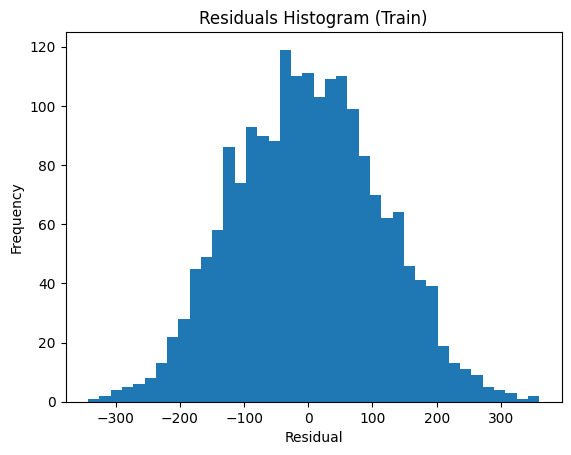

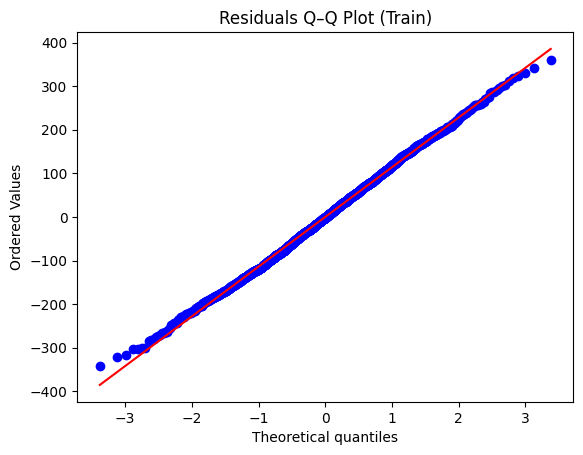

In [ ]:
#7

# Check normality of residuals for the Training set (Alcohol ~ Proline)
# Residuals on Train
y_train_pred = linreg.predict(X_proline_train)
residuals_train = y_train_series - y_train_pred

# Basic diagnostics: skewness and kurtosis
skew = stats.skew(residuals_train, bias=False)
kurtosis_excess = stats.kurtosis(residuals_train, fisher=True, bias=False)

# Histogram of training residuals
plt.figure()
plt.hist(residuals_train, bins=40)
plt.title("Residuals Histogram (Train)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Q–Q plot of training residuals
plt.figure()
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Residuals Q–Q Plot (Train)")
plt.show()


In [ ]:
#8
from scipy import stats
# Using residuals from the training set
t_stat, p_val = stats.ttest_1samp(residuals_train, popmean=0, alternative='two-sided')

rounded_p = f"{p_val:.3f}"
print("p_value:" f"{rounded_p}")

p_value:1.000


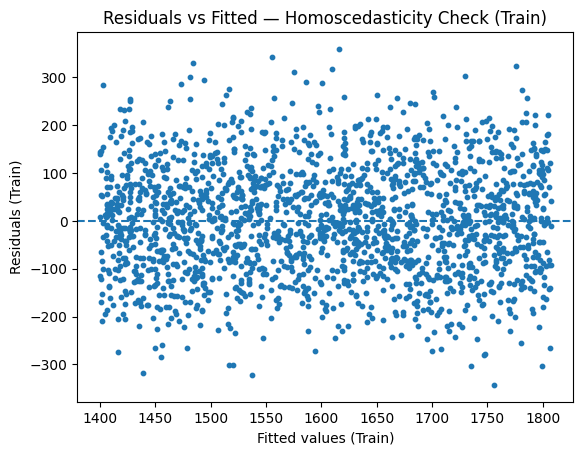

In [ ]:
#9

# Ensure residuals/fitted from the simple model (Alcohol ~ Proline) on Train
y_train_pred = linreg.predict(X_train[["Proline"]])
residuals_train = y_train["Alcohol"] - y_train_pred
fitted_train = pd.Series(y_train_pred, index=y_train.index)

plt.figure()
plt.scatter(fitted_train, residuals_train, s=10)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Residuals vs Fitted — Homoscedasticity Check (Train)")
plt.show()

In [ ]:
#10

# Prepare training data
X_train_all = X_train.copy()
y_train_series = y_train["Alcohol"]

# Add intercept
X_train_all_const = sm.add_constant(X_train_all, has_constant='add')

# Fit OLS
ols_model = sm.OLS(y_train_series, X_train_all_const).fit()

# Collect p-values (excluding the intercept for "variables" significance)
pvals = ols_model.pvalues.drop(labels=["const"], errors="ignore")

# Variables with p-value >= 0.05 are NOT significant
not_significant = pvals[pvals >= 0.05].sort_values(ascending=False)

# Also capture a compact table for review
summary_table = pd.DataFrame({
    "coef": ols_model.params.drop(labels=["const"], errors="ignore"),
    "p_value": pvals
}).sort_values("p_value", ascending=False)

not_significant_list = list(not_significant.index)
not_significant_list, summary_table.head(20)


(['Nonflavanoid_Phenols',
  'Magnesium',
  'Malic_Acid',
  'Ash',
  'Hue',
  'Ash_Alcalinity',
  'Color_Intensity'],
                            coef        p_value
 Nonflavanoid_Phenols  -0.058656   9.950103e-01
 Magnesium              0.002001   9.793816e-01
 Malic_Acid            -0.045090   9.360838e-01
 Ash                   -1.689550   6.493312e-01
 Hue                    5.582428   4.413061e-01
 Ash_Alcalinity         0.486176   3.257996e-01
 Color_Intensity       -1.168497   8.399912e-02
 OD280                 14.158965   3.948414e-93
 Proanthocyanins       19.219428  1.068929e-159
 Flavanoids             6.224623   0.000000e+00
 Total_Phenols         15.330414   0.000000e+00
 Proline                0.892181   0.000000e+00)

In [ ]:
#11

# Variables marked NOT significant at 0.05 from your previous step
insignificant_variables = [
    'Nonflavanoid_Phenols','Magnesium','Malic_Acid','Ash',
    'Hue','Ash_Alcalinity','Color_Intensity']

# Build reduced design matrix
X_multi = X.copy()
significant_variables = [var for var in X_multi.columns if var not in insignificant_variables]
X_significant = sm.add_constant(X_multi[significant_variables], has_constant='add')

# Keep the same split spec as before
X_significant_train, X_significant_test, y_train_significant, y_test_significant = train_test_split(
    X_significant, y, test_size=0.2, random_state=0)

# Fit reduced multiple linear regression
reduced_multi_model = sm.OLS(y_train_significant['Alcohol'], X_significant_train).fit()
print(reduced_multi_model.summary())

# Validity checks
f_test_passed = reduced_multi_model.f_pvalue < 0.05
t_tests_passed = (reduced_multi_model.pvalues.drop('const', errors='ignore') < 0.05).all()

print(f"\nF-test passed: {f_test_passed}")
print(f"All t-tests passed (excluding constant): {t_tests_passed}")

if f_test_passed and t_tests_passed:
    print("\nYes, the resulting model is valid as it passes the F-test and all the t-tests.")
elif f_test_passed and not t_tests_passed:
    print("\nNo, the resulting model is not valid. It passes the F-test but it does not pass at least one t-test.")
else:
    print("\nNo, the resulting model is not valid as it does not pass the F-test.")

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     4009.
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        03:27:39   Log-Likelihood:                -10101.
No. Observations:                1905   AIC:                         2.021e+04
Df Residuals:                    1899   BIC:                         2.025e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             289.2931     14.439     

In [ ]:
#12

#Adjusted R^2 of the reduced multiple linear regression on train set
adj_r2_train_reduced = reduced_multi_model.rsquared_adj
rounded_adj_r2_train_reduced = f"{adj_r2_train_reduced:.3f}"
print(rounded_adj_r2_train_reduced)

0.913


In [ ]:
#13

# Prepare validation data for the reduced model
X_val_reduced = sm.add_constant(X_val[significant_variables], has_constant='add')
y_val_true = y_val["Alcohol"]

# Predict on validation with the reduced model
y_val_pred_reduced = reduced_multi_model.predict(X_val_reduced)

# Compute R^2 on validation
sse = np.sum((y_val_true - y_val_pred_reduced) ** 2)
sst = np.sum((y_val_true - y_val_true.mean()) ** 2)
r2_val_reduced = 1 - sse/sst

# Adjusted R^2 (p predictors excluding the intercept)
p = X_val_reduced.shape[1] - 1  # predictors only (no intercept)
n = X_val_reduced.shape[0]
adj_r2_val_reduced = 1 - (1 - r2_val_reduced) * (n - 1) / (n - p - 1)
print(f"{adj_r2_val_reduced:.3f}")

0.913


In [ ]:
#15

#stepwise_selection, X_train, y_train already defined
selected = stepwise_selection(X_train, y_train["Alcohol"])
step_model = sm.OLS(y_train["Alcohol"], sm.add_constant(X_train[selected], has_constant='add')).fit()
print("Selected features:", selected)
print(f"Adjusted R^2 (train): {step_model.rsquared_adj:.3f}")

Add  Proline                        with p-value 0.000000
Add  Total_Phenols                  with p-value 0.000000
Add  Flavanoids                     with p-value 0.000000
Add  Proanthocyanins                with p-value 0.000000
Add  OD280                          with p-value 0.000000
Selected features: ['Proline', 'Total_Phenols', 'Flavanoids', 'Proanthocyanins', 'OD280']
Adjusted R^2 (train): 0.913


In [ ]:
#16

#Adjusted R^2 on the validation set for the stepwise model
# Use the already-fit step_model and selected_features from the stepwise step
X_val_step = sm.add_constant(X_val[selected], has_constant='add')
y_val_true = y_val["Alcohol"]
y_val_pred = step_model.predict(X_val_step)

# Compute R^2 on validation
sse = np.sum((y_val_true - y_val_pred) ** 2)
sst = np.sum((y_val_true - y_val_true.mean()) ** 2)
r2_val = 1 - sse/sst

# Adjusted R^2
p = X_val_step.shape[1] - 1  # exclude intercept
n = X_val_step.shape[0]
adj_r2_val = 1 - (1 - r2_val) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2 (validation): {adj_r2_val:.3f}")

Adjusted R^2 (validation): 0.913
